In [ ]:
# This can be run in google colab if stockquotes cannot be imported locally.
#!pip install stockquotes

In [2]:
import stockquotes

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import datetime
import pandas as pd
from sklearn import preprocessing

In [6]:
stocks = ['AAPL','MSFT', 'GE','SLB', 'AMZN', 'JPM','WMT','BA', 'KO','AMT']
# SLB: Schlumberger limited
# KO: Coca Cola
# WMT: Walmart
# BA: boeing
# AMT: american tower corp
# JNJ: Johnson & Johnson

In [7]:
stockquotes.Stock('JNJ').historical[0]

{'adjusted_close': 144.0,
 'close': 144.0,
 'date': datetime.datetime(2020, 11, 27, 0, 0),
 'high': 144.66,
 'low': 143.22,
 'open': 144.5,
 'volume': 3059000}

## Take a time range of last 3 months

In [8]:

end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(3*28)
start_date, end_date

(datetime.datetime(2020, 9, 6, 19, 10, 55, 394377),
 datetime.datetime(2020, 11, 29, 19, 10, 55, 394377))

## Extract date from stockquotes in a table
- Keep n row, where one row $(x_i^1, ..., x_i^p)$ = individual i = trading day
- Keep p column, where one column $(x_1^j, ..., x_n^j)$ = variable j = return of stock j.
In this case, n = trading days between the time range, and j = 8 stocks has been choosed.

In [9]:
histo = stockquotes.Stock("AAPL").historical
# keep ajusted close price
histo = pd.DataFrame.from_dict(histo)[['date','adjusted_close']].rename(columns = {'adjusted_close':'AAPL'})



In [10]:
for stock_name in stocks[1:]:
    histo2 = stockquotes.Stock(stock_name).historical
    # keep ajusted close price
    histo2 = pd.DataFrame.from_dict(histo2)[['date','adjusted_close']].rename(columns = {'adjusted_close':stock_name})
    histo = pd.merge(histo, histo2, on = 'date')

In [11]:
histo


,date,AAPL,MSFT,GE,SLB,AMZN,JPM,WMT,BA,KO,AMT
0,2020-11-27,116.59,215.23,10.40,21.88,3195.34,121.22,151.60,216.50,52.70,234.09
1,2020-11-25,116.03,213.87,10.50,22.10,3185.07,122.03,151.83,217.61,52.93,233.00
2,2020-11-24,115.17,213.86,10.45,22.23,3118.06,123.32,151.36,218.49,53.22,228.06
3,2020-11-23,113.85,210.11,10.07,21.61,3098.39,117.87,150.93,211.53,52.68,228.91
4,2020-11-20,117.34,210.39,9.76,20.21,3099.40,114.57,150.24,199.62,52.67,232.66
...,...,...,...,...,...,...,...,...,...,...,...
92,2020-07-20,98.01,210.54,6.86,18.32,3196.84,96.41,130.93,174.42,45.75,259.27
93,2020-07-17,95.99,201.86,7.06,18.50,2961.97,97.26,131.20,175.66,46.44,257.86
94,2020-07-16,96.18,202.90,7.04,18.70,2999.90,99.09,131.66,178.70,45.78,256.24
95,2020-07-15,97.38,207.00,7.13,18.78,3008.87,98.81,131.46,187.94,46.03,256.03


## Calculate daily return by using pct_change

In [13]:
df = histo.copy()
df.set_index('date', inplace=True)
df = df.pct_change()
df = df.dropna()

In [14]:

df.head()

,AAPL,MSFT,GE,SLB,AMZN,JPM,WMT,BA,KO,AMT
date,,,,,,,,,,
2020-11-25,-0.004803,-0.006319,0.009615,0.010055,-0.003214,0.006682,0.001517,0.005127,0.004364,-0.004656
2020-11-24,-0.007412,-0.000047,-0.004762,0.005882,-0.021039,0.010571,-0.003096,0.004044,0.005479,-0.021202
2020-11-23,-0.011461,-0.017535,-0.036364,-0.027890,-0.006308,-0.044194,-0.002841,-0.031855,-0.010147,0.003727
2020-11-20,0.030654,0.001333,-0.030785,-0.064785,0.000326,-0.027997,-0.004572,-0.056304,-0.000190,0.016382
2020-11-19,0.011079,0.009649,-0.010246,0.012370,0.005685,0.008641,0.012513,0.030308,0.008734,0.024800


## Standard normalization of stock return

In [15]:
StandardScaler = preprocessing.StandardScaler()
for stock_name in stocks:
    df[stock_name] = StandardScaler.fit_transform(df[[stock_name]])

In [16]:
df.head()

,AAPL,MSFT,GE,SLB,AMZN,JPM,WMT,BA,KO,AMT
date,,,,,,,,,,
2020-11-25,-0.118976,-0.292597,0.469863,0.319037,-0.129802,0.414387,0.215923,0.203000,0.413998,-0.379565
2020-11-24,-0.215180,0.005934,-0.030229,0.201121,-0.867123,0.598800,-0.126521,0.169305,0.493629,-1.467478
2020-11-23,-0.364516,-0.826446,-1.129448,-0.753299,-0.257800,-1.998041,-0.107615,-0.947508,-0.622713,0.171671
2020-11-20,1.188628,0.071589,-0.935386,-1.795947,0.016632,-1.230014,-0.236104,-1.708116,0.088632,1.003771
2020-11-19,0.466724,0.467411,-0.220982,0.384467,0.238308,0.507276,1.032267,0.986365,0.726156,1.557292


In [17]:

n = len(df)
p = len(stocks)
n, p

(96, 10)

## Apply PCA to dataframe

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)

In [20]:
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
pca.components_ 

array([[-0.20311372, -0.24829306, -0.34143193, -0.37069607, -0.15051239,
        -0.40464231, -0.22649685, -0.44493972, -0.4196621 , -0.17699209],
       [ 0.43453281,  0.43486205, -0.27140249, -0.24018067,  0.48335152,
        -0.23962151,  0.26817256, -0.15481074, -0.08822604,  0.30986494]])

In [22]:
covariance = pca.get_covariance()

In [23]:
lambdas, eigenvectors = np.linalg.eig(covariance)
print('eigenvalues = ', lambdas)
print('eigenvectors =', eigenvectors)

eigenvalues =  [0.42613958+0.00000000e+00j 3.09201522+0.00000000e+00j
 3.60413131+0.00000000e+00j 0.42613958+7.85046229e-17j
 0.42613958-7.85046229e-17j 0.42613958+0.00000000e+00j
 0.42613958+0.00000000e+00j 0.42613958+0.00000000e+00j
 0.42613958+0.00000000e+00j 0.42613958+0.00000000e+00j]
eigenvectors = [[-0.8774543 +0.j          0.43453281+0.j          0.20311372+0.j
   0.0907546 +0.02251011j  0.0907546 -0.02251011j  0.24638642+0.j
   0.10237384+0.j          0.00769352+0.j          0.02297238+0.j
  -0.08430295+0.j        ]
 [ 0.27282738+0.j          0.43486205+0.j          0.24829306+0.j
   0.54516592+0.j          0.54516592-0.j          0.30177603+0.j
   0.32007455+0.j          0.30775429+0.j          0.21309525+0.j
  -0.31658817+0.j        ]
 [-0.05536901+0.j         -0.27140249+0.j          0.34143193+0.j
   0.05818188-0.17911523j  0.05818188+0.17911523j  0.25004919+0.j
   0.0453288 +0.j          0.3369207 +0.j         -0.28718312+0.j
   0.10880547+0.j        ]
 [-0.03313326+0.j  

* Remark that np.linalg.eig return eigenvectors asof columns
* We can use pca.components_, which corresponds to correct eigenvectors of first greatest eigenvalues.

## Plot the projected component to the chosen 2 dimension space

In [24]:
# eigv from pca can be of *-1
# eigv1 = pca.components_[0]
# eigv2 = pca.components_[1]

# the sklearn pca may give eigenveteur with undesired sign. So just use np.linalg to get eigenvectors

lambda1 = sorted(lambdas)[-1]
lambda2 = sorted(lambdas)[-2]
eigv1 = eigenvectors[:,list(lambdas).index(lambda1)]
eigv2 = eigenvectors[:,list(lambdas).index(lambda2)]

axe1 = []; axe2 = []
for i in range(len(df)):
    axe1.append( df.iloc[i] @ eigv1)
    axe2.append( df.iloc[i] @ eigv2)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


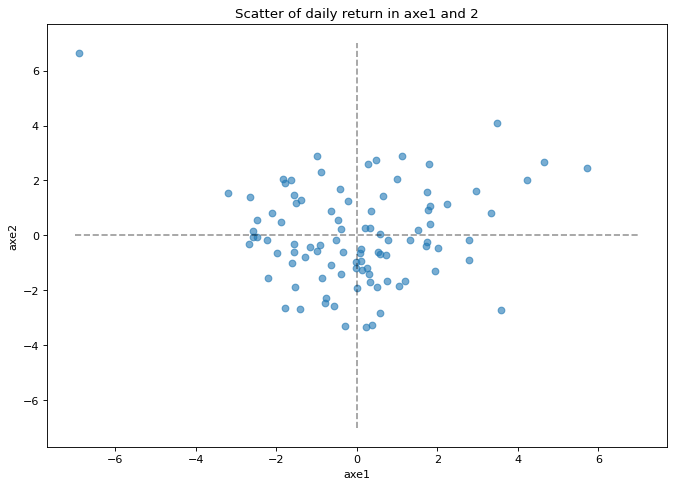

In [25]:
plt.figure(figsize = (10,7),dpi = 80)
plt.scatter(axe1, axe2, alpha=0.6)
plt.vlines(0, -7,7, linestyles='dashed', alpha = 0.4)
plt.hlines(0, -7,7, linestyles='dashed', alpha = 0.4)
plt.title('Scatter of daily return in axe1 and 2')
plt.xlabel('axe1')
plt.ylabel('axe2')
plt.show()

## Visualize correlation between p variables

$$r_{i,1} = v_i^1 \sqrt{\lambda_1}, \quad r_{i,2} = v_i^2 \sqrt{\lambda_2}$$

With $\textbf{v}_i, \textbf{v}_j$ normalized vectors, the $p$ points $(r_{i,1}, r_{i,2})$ find themself inside an unit circle. And the angle between each two points shows whether they are positively or negatively correlated. 

In [26]:

pca.explained_variance_

array([3.60413131, 3.09201522])

In [27]:
r1 = np.zeros(p)
r2 = np.zeros(p)
lmd1 = pca.explained_variance_[0]
lmd2 = pca.explained_variance_[1]
for i in range(p):
    r1[i] = eigv1[i]*np.sqrt(lmd1)
    r2[i] = eigv2[i]*np.sqrt(lmd2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


In [30]:

stock_fullnames = ['Apple', 'Microsoft', 'General Electric', 'Schlumberger', 'Amazon', 'J.P.Morgan', 'Walmart', 'Boeing', 'Coca Cola', 'American Tower Corp']

## Visualize stock's correlation in the subpace's plan

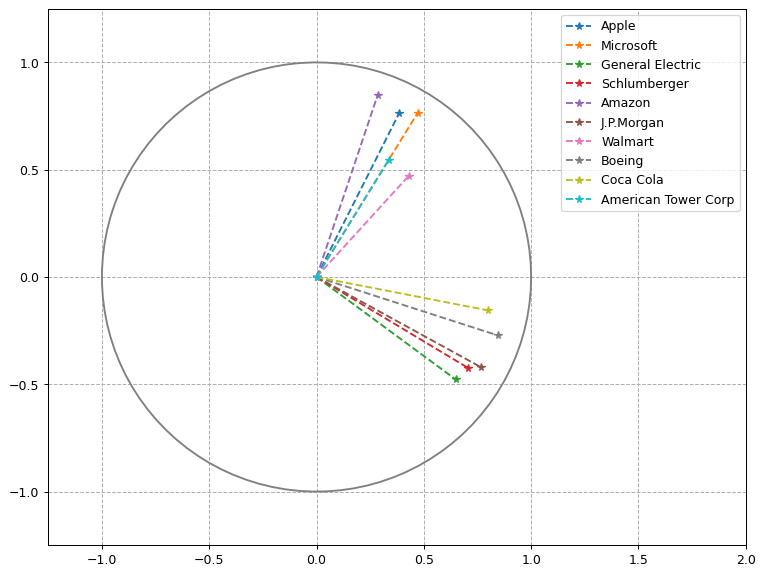

In [32]:

theta = np.linspace(0, 2*np.pi, 100)

r = np.sqrt(1.0)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

fig, ax = plt.subplots(figsize=(10, 8), dpi = 90)

ax.plot(x1, x2, 'gray')
ax.set_aspect(1)

plt.xlim(-1.25,2)
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')

for i in range(p):
    plt.plot([0 ,r1[i]], [0, r2[i]], '--*', label = stock_fullnames[i] )
plt.legend()

plt.show()